# Tutorial Machine Learning: Polynomial Regression

Selamat datang di tutorial tentang Polynomial Regression! Tutorial ini akan membahas bagaimana menangani hubungan non-linear dalam data menggunakan Polynomial Regression.

## Daftar Isi:
1. Pengenalan Polynomial Regression
   - Apa itu Polynomial Regression?
   - Perbedaan dengan Linear Regression
   - Kapan menggunakan Polynomial Regression?
2. Konsep Matematika
   - Persamaan Polinomial
   - Feature Transformation
   - Overfitting vs Underfitting
3. Implementasi dengan Python
   - Simple Polynomial Regression
   - Multiple Polynomial Regression
4. Evaluasi Model
   - Metrics
   - Cross-Validation
   - Bias-Variance Tradeoff
5. Studi Kasus
6. Latihan

Mari kita mulai!

## 1. Pengenalan Polynomial Regression

### Apa itu Polynomial Regression?
Polynomial Regression adalah bentuk perluasan dari Linear Regression yang dapat menangkap hubungan non-linear antara variabel independen dan dependen dengan menambahkan bentuk polynomial dari variabel independen.

### Persamaan Polynomial Regression:
- Degree 1 (Linear): \[ y = b_0 + b_1x \]
- Degree 2 (Quadratic): \[ y = b_0 + b_1x + b_2x^2 \]
- Degree 3 (Cubic): \[ y = b_0 + b_1x + b_2x^2 + b_3x^3 \]
- Degree n: \[ y = b_0 + b_1x + b_2x^2 + ... + b_nx^n \]

### Kapan Menggunakan Polynomial Regression?
1. Ketika hubungan antara variabel tidak linear
2. Ketika data menunjukkan pola kurva
3. Ketika Linear Regression menghasilkan error yang tinggi
4. Ketika visualisasi data menunjukkan tren non-linear

Mari kita lihat contoh implementasinya:

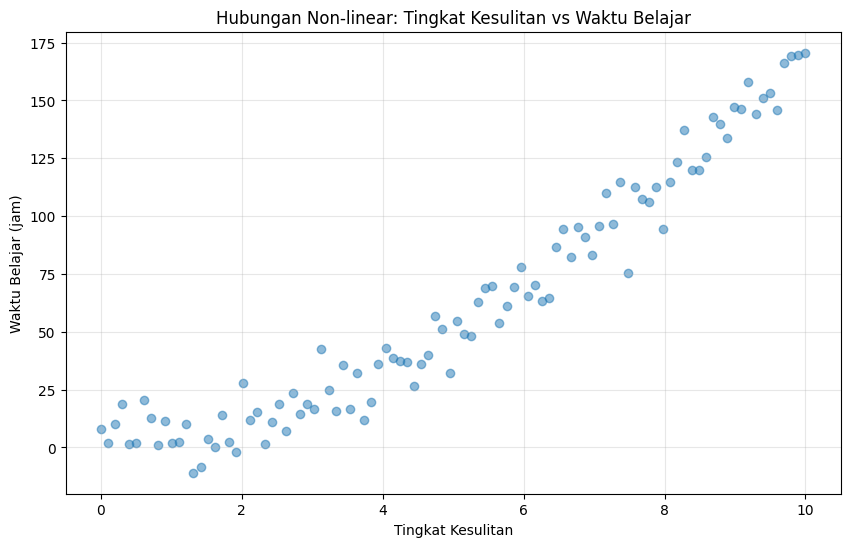

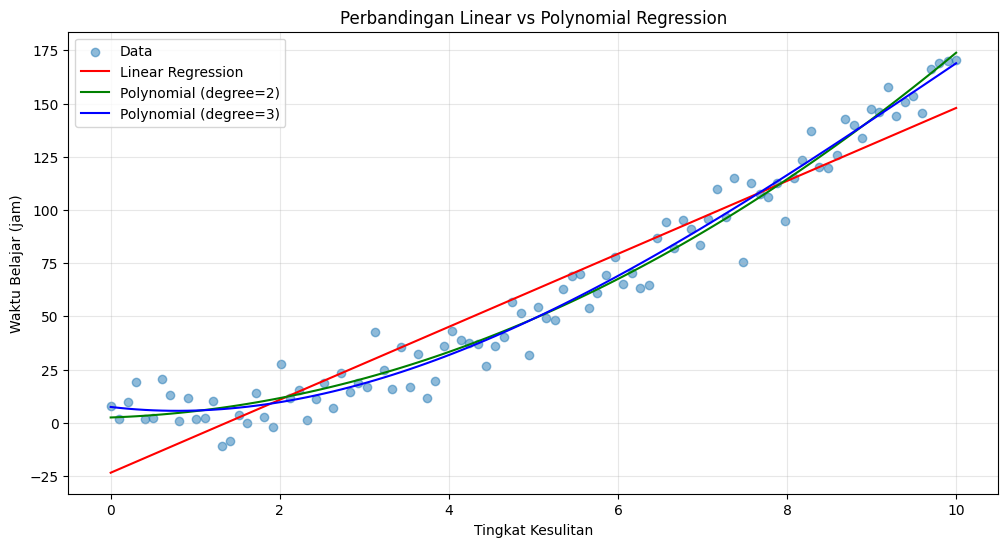

Evaluasi Model:
--------------------------------------------------
Linear Regression:
R² Score: 0.9176
RMSE: 14.9755

Polynomial Regression (degree=2):
R² Score: 0.9702
RMSE: 9.0100

Polynomial Regression (degree=3):
R² Score: 0.9716
RMSE: 8.7884


In [1]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline

# Set random seed untuk reproduktifitas
np.random.seed(42)

# Membuat data non-linear (contoh: hubungan antara tingkat kesulitan dan waktu belajar)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 + 2*X + 1.5*X**2 + np.random.normal(0, 10, (100,1))

# Visualisasi data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)
plt.xlabel('Tingkat Kesulitan')
plt.ylabel('Waktu Belajar (jam)')
plt.title('Hubungan Non-linear: Tingkat Kesulitan vs Waktu Belajar')
plt.grid(True, alpha=0.3)
plt.show()

# Membandingkan Linear vs Polynomial Regression
# 1. Linear Regression
model_linear = LinearRegression()
model_linear.fit(X, y)
y_pred_linear = model_linear.predict(X)

# 2. Polynomial Regression (degree=2)
model_poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model_poly.fit(X, y)
y_pred_poly = model_poly.predict(X)

# 3. Polynomial Regression (degree=3)
model_poly3 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
model_poly3.fit(X, y)
y_pred_poly3 = model_poly3.predict(X)

# Visualisasi perbandingan
plt.figure(figsize=(12, 6))
plt.scatter(X, y, alpha=0.5, label='Data')
plt.plot(X, y_pred_linear, color='red', label='Linear Regression')
plt.plot(X, y_pred_poly, color='green', label='Polynomial (degree=2)')
plt.plot(X, y_pred_poly3, color='blue', label='Polynomial (degree=3)')
plt.xlabel('Tingkat Kesulitan')
plt.ylabel('Waktu Belajar (jam)')
plt.title('Perbandingan Linear vs Polynomial Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Evaluasi model
print("Evaluasi Model:")
print("-" * 50)
print("Linear Regression:")
print(f"R² Score: {r2_score(y, y_pred_linear):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred_linear)):.4f}")

print("\nPolynomial Regression (degree=2):")
print(f"R² Score: {r2_score(y, y_pred_poly):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred_poly)):.4f}")

print("\nPolynomial Regression (degree=3):")
print(f"R² Score: {r2_score(y, y_pred_poly3):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred_poly3)):.4f}")

## 2. Overfitting dan Underfitting

Salah satu tantangan utama dalam Polynomial Regression adalah menentukan degree polynomial yang tepat untuk menghindari:

### Underfitting (High Bias)
- Model terlalu sederhana
- Tidak dapat menangkap pola dalam data
- Degree polynomial terlalu rendah
- Performance buruk pada training dan test set

### Overfitting (High Variance)
- Model terlalu kompleks
- Menangkap noise dalam data
- Degree polynomial terlalu tinggi
- Performance sangat baik pada training set tapi buruk pada test set

Mari kita lihat contoh overfitting dan underfitting dengan membandingkan berbagai degree polynomial:

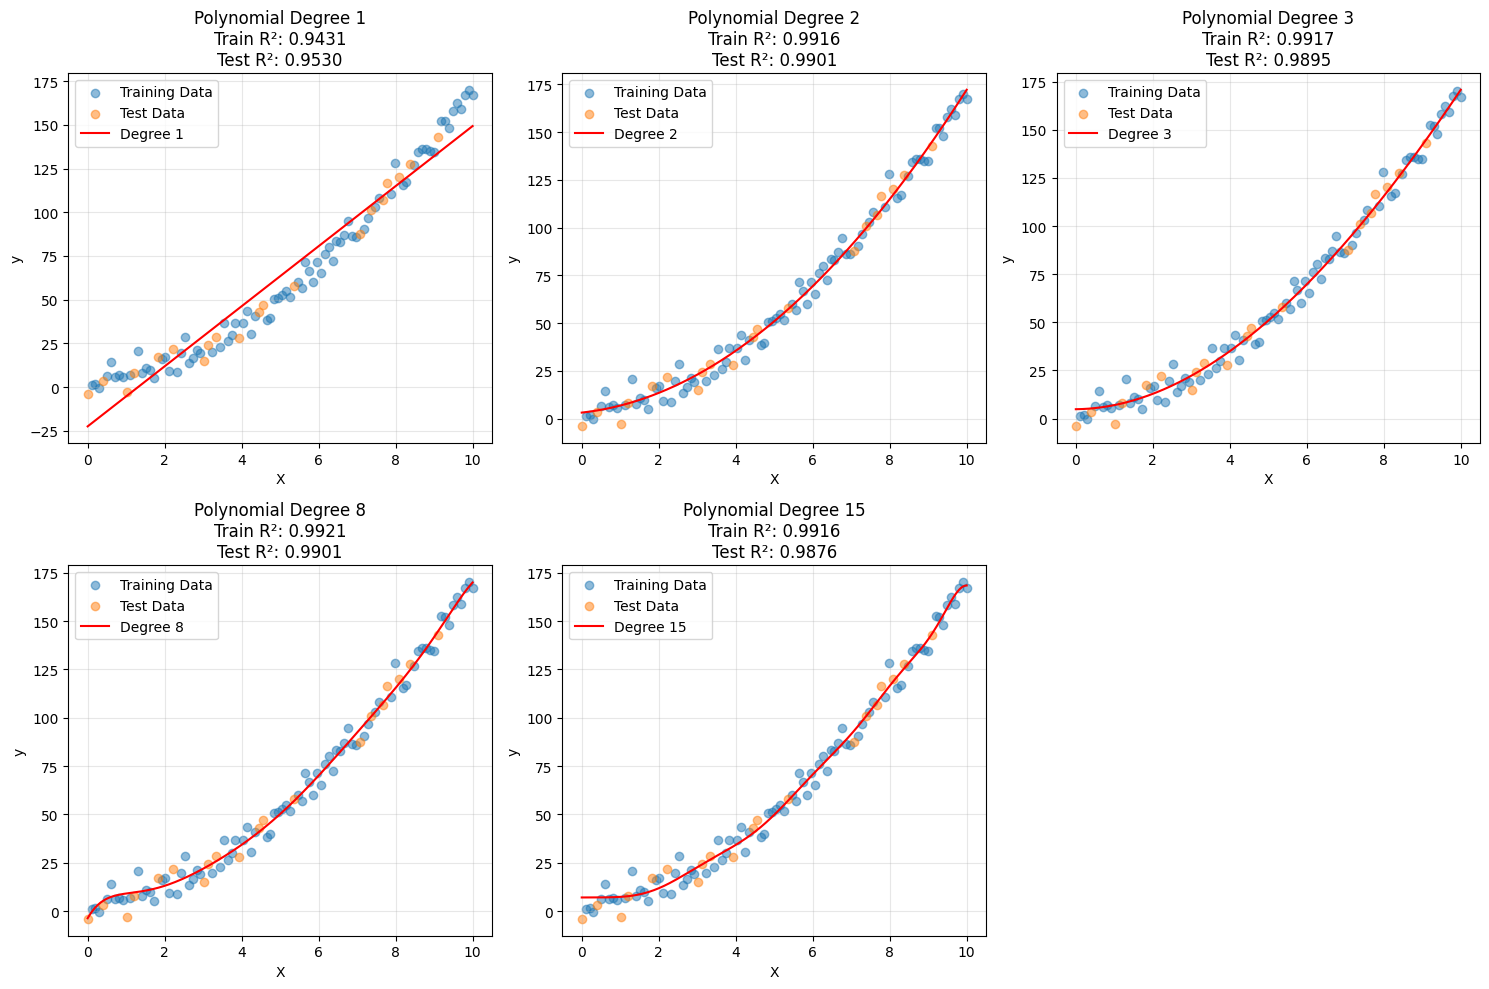

Perbandingan R² Scores untuk Different Degrees:
--------------------------------------------------
Degree | Train R²  | Test R²   | Difference
--------------------------------------------------
     1 | 0.943060 | 0.952965 | -0.009905
     2 | 0.991566 | 0.990080 | 0.001486
     3 | 0.991709 | 0.989532 | 0.002177
     8 | 0.992122 | 0.990062 | 0.002060
    15 | 0.991612 | 0.987597 | 0.004016


In [2]:
# Membuat data baru dengan noise yang lebih kecil untuk demonstrasi overfitting
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 + 2*X + 1.5*X**2 + np.random.normal(0, 5, (100,1))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model dengan berbagai degree
degrees = [1, 2, 3, 8, 15]
models = {}
train_scores = {}
test_scores = {}

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # Simpan model dan scores
    models[degree] = model
    train_scores[degree] = r2_score(y_train, model.predict(X_train))
    test_scores[degree] = r2_score(y_test, model.predict(X_test))

# Visualisasi hasil
plt.figure(figsize=(15, 10))

# Plot untuk setiap degree
for i, degree in enumerate(degrees, 1):
    plt.subplot(2, 3, i)
    plt.scatter(X_train, y_train, alpha=0.5, label='Training Data')
    plt.scatter(X_test, y_test, alpha=0.5, label='Test Data')
    
    # Buat prediksi dengan range data yang lebih smooth
    X_smooth = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    y_smooth = models[degree].predict(X_smooth)
    
    plt.plot(X_smooth, y_smooth, color='red', label=f'Degree {degree}')
    plt.title(f'Polynomial Degree {degree}\nTrain R²: {train_scores[degree]:.4f}\nTest R²: {test_scores[degree]:.4f}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print perbandingan scores
print("Perbandingan R² Scores untuk Different Degrees:")
print("-" * 50)
print("Degree | Train R²  | Test R²   | Difference")
print("-" * 50)
for degree in degrees:
    diff = train_scores[degree] - test_scores[degree]
    print(f"{degree:6d} | {train_scores[degree]:.6f} | {test_scores[degree]:.6f} | {diff:.6f}")

## 3. Feature Engineering untuk Polynomial Regression

Dalam Polynomial Regression, feature engineering sangat penting untuk:
1. Membuat interaksi antar fitur
2. Menangani multicollinearity
3. Scaling features
4. Selecting optimal features

### Teknik Feature Engineering:
1. **Polynomial Features**
   - Menambahkan pangkat dari fitur
   - Menambahkan interaksi antar fitur

2. **Feature Scaling**
   - StandardScaler
   - MinMaxScaler
   - RobustScaler

3. **Feature Selection**
   - Forward Selection
   - Backward Elimination
   - Stepwise Selection

Mari kita implementasikan beberapa teknik ini:

Hasil Polynomial Feature Engineering:
--------------------------------------------------
Degree | # Features | Train R² | Test R²
--------------------------------------------------
     1 |          2 | 0.978937 | 0.987364
     2 |          2 | 0.993816 | 0.992431
     3 |          2 | 0.994316 | 0.992353


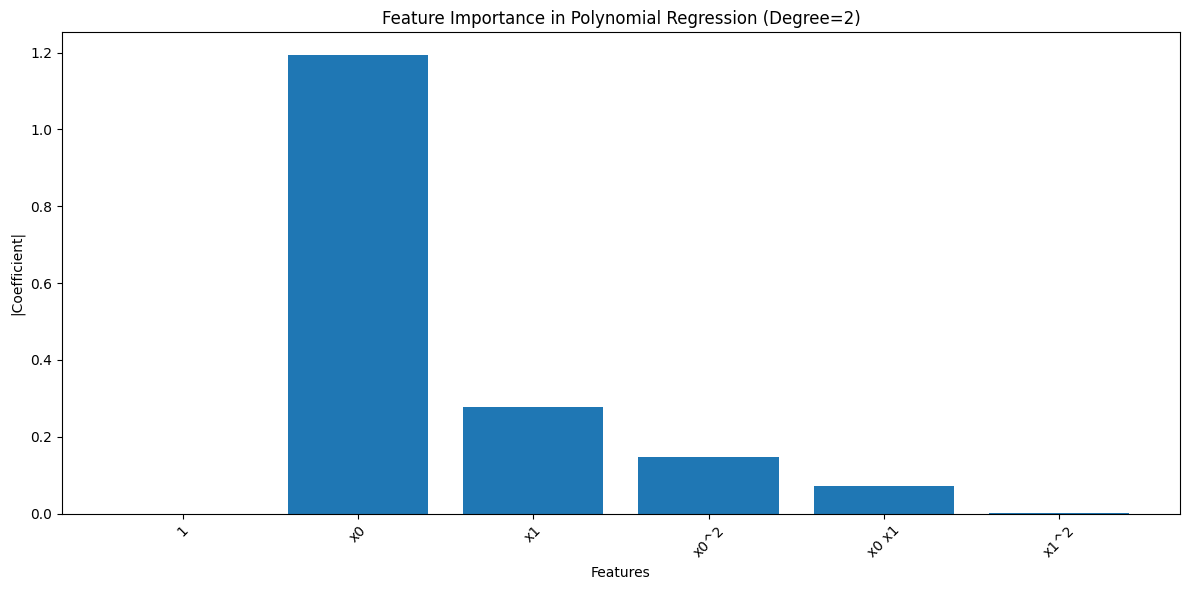

In [3]:
# Membuat dataset dengan multiple features
n_samples = 100
X_multi = np.random.rand(n_samples, 2)  # 2 features
y_multi = (3 + 2*X_multi[:, 0] + 1.5*X_multi[:, 0]**2 + 
           0.5*X_multi[:, 1] + X_multi[:, 0]*X_multi[:, 1] + 
           np.random.normal(0, 0.1, n_samples))

# Split data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

# 1. Polynomial Features dengan berbagai degrees
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

degrees = [1, 2, 3]
results = {}

for degree in degrees:
    # Buat pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=degree)),
        ('regressor', LinearRegression())
    ])
    
    # Fit pipeline
    pipeline.fit(X_train_multi, y_train_multi)
    
    # Evaluasi
    train_score = pipeline.score(X_train_multi, y_train_multi)
    test_score = pipeline.score(X_test_multi, y_test_multi)
    
    results[degree] = {
        'train_score': train_score,
        'test_score': test_score,
        'n_features': pipeline.named_steps['poly'].n_features_in_
    }

# Print results
print("Hasil Polynomial Feature Engineering:")
print("-" * 50)
print("Degree | # Features | Train R² | Test R²")
print("-" * 50)
for degree in degrees:
    res = results[degree]
    print(f"{degree:6d} | {res['n_features']:10d} | {res['train_score']:.6f} | {res['test_score']:.6f}")

# 2. Visualisasi feature importance
degree = 2  # Pilih degree=2 untuk visualisasi
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=degree)),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train_multi, y_train_multi)
feature_names = pipeline.named_steps['poly'].get_feature_names_out()
coefficients = pipeline.named_steps['regressor'].coef_

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.bar(range(len(coefficients)), abs(coefficients))
plt.xticks(range(len(coefficients)), feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('|Coefficient|')
plt.title('Feature Importance in Polynomial Regression (Degree=2)')
plt.tight_layout()
plt.show()

## 4. Cross-Validation dan Model Selection

Pemilihan model yang tepat dalam Polynomial Regression sangat penting untuk menghindari overfitting. Beberapa teknik yang dapat digunakan:

1. **K-Fold Cross-Validation**
   - Membagi data menjadi k fold
   - Melatih dan mengevaluasi model pada setiap fold
   - Mendapatkan estimasi performa yang lebih robust

2. **Grid Search**
   - Mencoba berbagai kombinasi hyperparameter
   - Memilih model dengan performa terbaik
   - Hyperparameter utama: degree polynomial

3. **Validation Curve**
   - Memvisualisasikan performa model vs hyperparameter
   - Membantu memahami overfitting/underfitting
   - Membantu memilih degree optimal

Mari kita implementasikan teknik-teknik ini:

## 5. Latihan

Gunakan dataset yang telah kita buat untuk menyelesaikan soal-soal berikut:

1. Implementasikan Polynomial Regression dengan regularization (Ridge/Lasso):
   - Bandingkan performa dengan dan tanpa regularization
   - Visualisasikan pengaruh parameter regularization
   - Pilih parameter regularization optimal

2. Buat fungsi untuk memilih degree polynomial optimal:
   - Gunakan cross-validation
   - Implementasikan early stopping
   - Visualisasikan learning curves

3. Terapkan Polynomial Regression pada dataset real:
   - Load dataset dari sklearn.datasets
   - Lakukan preprocessing yang sesuai
   - Bandingkan dengan model lain (Linear Regression, SVR)

4. Implementasikan feature selection untuk Polynomial Regression:
   - Gunakan metode forward/backward selection
   - Evaluasi importance setiap feature
   - Bandingkan performa sebelum dan sesudah selection

5. Buat pipeline lengkap untuk Polynomial Regression:
   - Preprocessing
   - Feature engineering
   - Model selection
   - Evaluation

Berikut adalah template kode untuk latihan:

In [ ]:
# Template untuk latihan

# Soal 1: Polynomial Regression dengan Regularization
from sklearn.linear_model import Ridge, Lasso
def polynomial_regression_with_regularization(X, y, degrees, alphas):
    # Lengkapi kode di sini...
    pass

# Soal 2: Pemilihan Degree Optimal
from sklearn.model_selection import KFold
def find_optimal_degree(X, y, max_degree=10):
    # Lengkapi kode di sini...
    pass

# Soal 3: Aplikasi pada Dataset Real
from sklearn.datasets import load_boston
def apply_to_real_dataset():
    # Lengkapi kode di sini...
    pass

# Soal 4: Feature Selection
from sklearn.feature_selection import SelectKBest
def polynomial_feature_selection(X, y, degree):
    # Lengkapi kode di sini...
    pass

# Soal 5: Pipeline Lengkap
from sklearn.pipeline import Pipeline
def create_polynomial_pipeline():
    # Lengkapi kode di sini...
    pass

# Jalankan fungsi-fungsi di atas
# polynomial_regression_with_regularization(X, y, degrees=[1,2,3], alphas=[0.1,1,10])
# optimal_degree = find_optimal_degree(X, y)
# apply_to_real_dataset()
# selected_features = polynomial_feature_selection(X, y, degree=2)
# pipeline = create_polynomial_pipeline()